In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# make yaml file for data
with open('data.yaml', 'w') as f:
    f.write('train: /content/drive/MyDrive/dataset/train/images\n')
    f.write('val: /content/drive/MyDrive/dataset/valid/images\n')
    f.write('test: /content/drive/MyDrive/dataset/test/images\n')
    f.write('nc: 1\n')
    f.write("names: ['stone']\n")

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 50.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# import model
model = YOLO("/content/drive/MyDrive/CV_finalproject_tuned_model_yolov9.pt")

In [ ]:
# tune model to find the most suitable hyperparameters
model.tune(data="/content/drive/MyDrive/dataset/data.yaml", epochs=20, iterations=10, optimizer="auto", plots=False, save=False, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune2'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (1498.93s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.34636 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.823, 'metrics/recall(B)': 0.68923, 'metrics/mAP50(B)': 0.73799, 'metrics/mAP50-95(B)': 0.30284, 'val/box_loss': 1.99485, 'val/cls_loss'

In [ ]:
model = YOLO('/content/runs/detect/tune2/weights/best.pt') # get best model from hyperparameter tuning

In [ ]:
# train model
results = model.train(data="/content/data.yaml", epochs=50, val = True, pretrained = True, optimizer = "auto", save = True, project="kidney_stone", name="yolov9_final", patience=0)

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/CV_finalproject_tuned_model_yolov9.pt, data=/content/data.yaml, epochs=50, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=kidney_stone, name=yolov9_final4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 93.0MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512

100%|██████████| 5.35M/5.35M [00:00<00:00, 170MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset/train/labels... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [13:19<00:00,  1.32it/s]


train: New cache created: /content/drive/MyDrive/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/dataset/valid/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [01:35<00:00,  1.28it/s]

val: New cache created: /content/drive/MyDrive/dataset/valid/labels.cache


Plotting labels to kidney_stone/yolov9_final4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to kidney_stone/yolov9_final4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.1G      1.919      0.989      1.206         40        640: 100%|██████████| 66/66 [00:58<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]

                   all        123        325      0.754      0.642      0.677      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.1G      1.994      1.041      1.229         47        640: 100%|██████████| 66/66 [00:55<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        123        325   0.000165     0.0185   8.35e-05   4.17e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50        11G      2.039      1.125       1.25         41        640: 100%|██████████| 66/66 [00:54<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        123        325      0.698      0.634      0.649      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.2G      2.026      1.124      1.257         48        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        123        325      0.648      0.615       0.63      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.1G      2.029       1.12      1.245         48        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        123        325      0.741      0.591      0.619      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.2G       2.03       1.07       1.28         38        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        123        325      0.738       0.64      0.637       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.1G      2.006      1.065      1.257         51        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        123        325      0.675      0.649       0.65      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.1G      2.003       1.05      1.263         71        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]

                   all        123        325       0.73      0.646      0.651      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.2G      2.033      1.033      1.251         41        640: 100%|██████████| 66/66 [00:55<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        123        325      0.733       0.64      0.664       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.1G      1.989      1.039      1.238         40        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        123        325      0.726      0.625      0.655      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.1G      2.009      1.007      1.256         44        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        123        325      0.718      0.575      0.583       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.1G      1.962      1.003      1.232         49        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        123        325      0.708       0.67      0.683      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.2G      1.959     0.9893      1.239         37        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        123        325      0.765      0.699      0.711      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.2G      1.966      1.009      1.219         58        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        123        325      0.767       0.68      0.668      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.1G      1.926     0.9794       1.24         27        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        123        325      0.731      0.689      0.674      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        11G      1.924     0.9664      1.221         40        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        123        325      0.762      0.698       0.74      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.2G      1.944     0.9741      1.239         51        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        123        325      0.724      0.686      0.655      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.1G      1.936     0.9417       1.21         46        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        123        325       0.78       0.71      0.747      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.2G      1.948     0.9619      1.215         36        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        123        325      0.806      0.665      0.738      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.1G       1.89     0.9377      1.215         41        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        123        325      0.784      0.693      0.722      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.1G      1.869     0.9305      1.199         48        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        123        325      0.753      0.713      0.728       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.1G      1.866     0.9103      1.195         36        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        123        325      0.752      0.708      0.712      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.2G      1.908     0.9423      1.197         44        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        123        325      0.701       0.72      0.686      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.1G      1.854     0.9176      1.206         65        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        123        325      0.797      0.698      0.755      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.1G      1.837     0.9019      1.166         44        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        123        325      0.789      0.668      0.689      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.1G      1.863     0.9071      1.187         54        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        123        325      0.786      0.674      0.748      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.1G      1.853     0.9027      1.161         55        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        123        325      0.745      0.729      0.749      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.1G      1.837     0.8908      1.149         21        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        123        325      0.752      0.695      0.737      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.2G      1.815     0.8767      1.161         34        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        123        325      0.792      0.729      0.749      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.1G      1.808     0.8479      1.173         33        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        123        325      0.777      0.708      0.752      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        11G      1.814     0.8498      1.153         55        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        123        325      0.752      0.718      0.729      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.1G      1.775     0.8479      1.126         41        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        123        325      0.802      0.695      0.709      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.1G      1.741     0.8248      1.142         58        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        123        325      0.804      0.708      0.761      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.2G      1.751     0.8228      1.135         30        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        123        325      0.759      0.717       0.74      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.1G      1.744      0.827      1.136         42        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        123        325      0.773       0.68      0.734      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.1G      1.774      0.824      1.134         44        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        123        325       0.76      0.703      0.753      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.1G      1.715     0.8084      1.128         67        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        123        325       0.74      0.728      0.703      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.1G      1.736     0.8137      1.132         53        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        123        325      0.753      0.702      0.709      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        11G      1.698     0.7861      1.111         69        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        123        325      0.793      0.684      0.725      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.1G      1.738     0.8059      1.131         62        640: 100%|██████████| 66/66 [00:54<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        123        325        0.8       0.68      0.723      0.282


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.1G      1.728     0.7943      1.152         18        640: 100%|██████████| 66/66 [00:55<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        123        325      0.781      0.692      0.723      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.1G      1.691     0.7771      1.141         28        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        123        325      0.796      0.665      0.711      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.1G      1.679     0.7721      1.138         31        640: 100%|██████████| 66/66 [00:53<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        123        325      0.738      0.711      0.708      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.1G      1.663      0.755      1.147         27        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        123        325      0.765      0.726      0.744      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.2G       1.64     0.7491      1.118         26        640: 100%|██████████| 66/66 [00:54<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        123        325      0.759      0.727      0.736      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.1G      1.596     0.7336      1.104         30        640: 100%|██████████| 66/66 [00:53<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        123        325       0.81      0.693      0.749      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.1G      1.609     0.7334      1.117         32        640: 100%|██████████| 66/66 [00:53<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        123        325      0.803      0.705      0.739      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.2G      1.598     0.7179      1.097         23        640: 100%|██████████| 66/66 [00:53<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        123        325      0.751      0.705       0.73      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.2G      1.563     0.7189      1.082         29        640: 100%|██████████| 66/66 [00:53<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        123        325      0.777      0.732      0.741      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.1G      1.575     0.7104      1.102         24        640: 100%|██████████| 66/66 [00:53<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        123        325      0.759       0.72      0.733      0.297



50 epochs completed in 0.833 hours.
Optimizer stripped from kidney_stone/yolov9_final4/weights/last.pt, 51.6MB
Optimizer stripped from kidney_stone/yolov9_final4/weights/best.pt, 51.6MB

Validating kidney_stone/yolov9_final4/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


                   all        123        325      0.783      0.708      0.753      0.309
Speed: 0.3ms preprocess, 14.0ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to kidney_stone/yolov9_final4


In [ ]:
# get best model and the metrics from training
best_model = YOLO('kidney_stone/yolov9_final4/weights/best.pt')
metrics = model.val()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25,320,019 parameters, 0 gradients, 102.3 GFLOPs


val: Scanning /content/drive/MyDrive/dataset/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]


                   all        123        325      0.773      0.702       0.75      0.309
Speed: 0.6ms preprocess, 27.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to kidney_stone/yolov9_final42


In [ ]:
metrics.box.map50

0.7496661723129954

In [ ]:
metrics.box.map75

0.1585982563203947

In [ ]:
metrics.box.maps

array([    0.30861])

In [ ]:
metrics.box.map

0.3086062167734282

In [ ]:
metrics.box.p

array([    0.77263])

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_path = '/content/drive/MyDrive/dataset/test/images'
test_list = os.listdir(test_path)
random_test_img = random.sample(test_list, 9)

In [ ]:
def show_image(img_path, model):
    img = cv2.imread(img_path)
    result = model(img)
    res_img = result[0].plot()
    res_img = cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB)
    return res_img


0: 544x640 1 stone, 66.7ms
Speed: 6.3ms preprocess, 66.7ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 stone, 46.5ms
Speed: 6.0ms preprocess, 46.5ms inference, 3.6ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 stone, 46.1ms
Speed: 4.6ms preprocess, 46.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 stones, 45.9ms
Speed: 3.8ms preprocess, 45.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 stone, 46.0ms
Speed: 3.8ms preprocess, 46.0ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 stones, 46.0ms
Speed: 3.3ms preprocess, 46.0ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 stones, 29.4ms
Speed: 2.8ms preprocess, 29.4ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 stones, 32.0ms
Speed: 2.4ms preprocess, 32.0ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 6

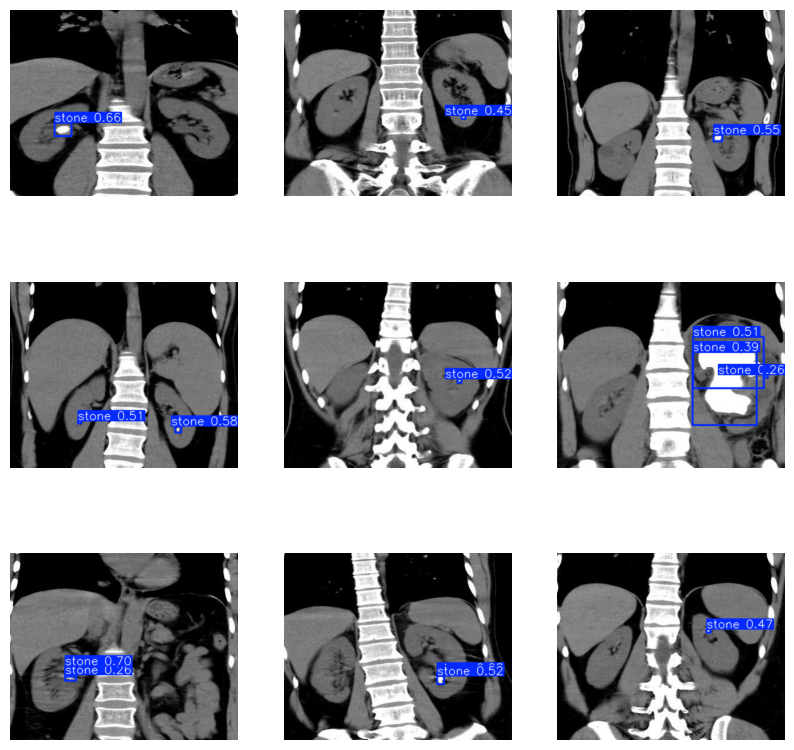

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for index, image_file in enumerate(random_test_img):

    row_index = index // 3
    col_index = index % 3

    img_path = os.path.join(test_path, image_file)
    detect_img = show_image(img_path, best_model)

    axes[row_index, col_index].imshow(detect_img)
    axes[row_index, col_index].axis('off')

In [ ]:
from google.colab import files

In [ ]:
files.download('kidney_stone/yolov9_final4/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>